In [19]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [20]:
# Read data from excel
online=pd.read_excel("/content/Online Retail.xlsx",)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
# get the basic data from dataset
online.shape

(541909, 8)

In [22]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [23]:
online.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [24]:
# Check for the null values
online.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [25]:
# chcek for duplicate Values
online.duplicated().any()

np.True_

In [26]:
# Drop the null values in the dataset
online_df=online.dropna()
online_df.shape

(406829, 8)

In [27]:
# Removing the InvoiceNo which starts with C denotes Cancelled transaction
online_rf=online_df[~online_df['InvoiceNo'].str.contains("C",na=False)]
online_rf.shape

(397924, 8)

In [28]:
# Check for the duplicate records
duplicates = online_rf[online_rf.duplicated()]
display(duplicates)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [29]:
online_rf[(online_rf['StockCode']==21866) & (online_rf['CustomerID']==17908.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom


In [30]:
# Drop the duplicates from the dataset
online_rf.drop_duplicates()
online_rf.duplicated().any()

np.True_

In [31]:
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [32]:
# change the datatype of Customer to string
online['CustomerID']=online['CustomerID'].astype(str)
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object


In [33]:
online_rf.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [34]:
online_rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [35]:
online_rf.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,397924.0,13.021823,1.0,2.0,6.0,12.0,80995.0,180.42021
InvoiceDate,397924,2011-07-10 23:43:36.912475648,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-12-09 12:50:00,NaN
UnitPrice,397924.0,3.116174,0.0,1.25,1.95,3.75,8142.75,22.096788
CustomerID,397924.0,15294.315171,12346.0,13969.0,15159.0,16795.0,18287.0,1713.169877


In [36]:
online_rf.describe(include='object').T

,count,unique,top,freq
InvoiceNo,397924,18536,576339,542
StockCode,397924,3665,85123A,2035
Description,397924,3877,WHITE HANGING HEART T-LIGHT HOLDER,2028
Country,397924,37,United Kingdom,354345


In [37]:
online_rf.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
358566,568154,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,6,2011-09-25 12:06:00,0.29,13787.0,United Kingdom
408631,571987,21498,RED RETROSPOT WRAP,25,2011-10-20 10:47:00,0.42,17007.0,United Kingdom
236720,557775,21703,BAG 125g SWIRLY MARBLES,48,2011-06-22 15:06:00,0.42,16966.0,United Kingdom
476892,577038,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2011-11-17 13:30:00,4.95,14796.0,United Kingdom
259946,559784,23344,JUMBO BAG 50'S CHRISTMAS,10,2011-07-12 12:07:00,2.08,16839.0,United Kingdom


In [38]:
#Adding new column amount to calculate total amount of transactions
online['Amount']=online['Quantity']*online['UnitPrice']
online.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
339154,566581,22271,FELTCRAFT DOLL ROSIE,1,2011-09-13 13:47:00,2.95,16081.0,United Kingdom,2.95
504971,578998,79063D,"RETRO PILL BOX , REVOLUTIONARY",1,2011-11-27 16:05:00,0.19,15436.0,United Kingdom,0.19
293818,562621,23202,JUMBO BAG VINTAGE LEAF,10,2011-08-08 12:36:00,2.08,14415.0,United Kingdom,20.80
403028,571544,22810,SET OF 6 T-LIGHTS SNOWMEN,2,2011-10-17 16:53:00,2.95,17757.0,United Kingdom,5.90
115226,546111,22294,HEART FILIGREE DOVE SMALL,2,2011-03-09 12:39:00,1.25,14165.0,United Kingdom,2.50


**Data Preparation**
-  R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
-  M (Monetary): Total amount of transactions (revenue contributed)

In [44]:
# Get the latest invoice date from the dataset
now = online_rf.InvoiceDate.max()


# Group data by CustomerID and calculate RFM metrics
rfm = online.groupby('CustomerID').agg(
    {
        'InvoiceDate': lambda x: (now - x.max()).days,  # recency
        'InvoiceNo': 'nunique',                        # frequency
        'Amount': 'sum'                                # monetary
    }
)
rfm.reset_index(inplace=True)

# Rename the columns for clarity
rfm.columns = ['CustomerID', 'recency', 'frequency', 'monetary']

# Display the first few rows of the RFM DataFrame
rfm.head()


,CustomerID,recency,frequency,monetary
0,12346.0,325,2,0.00
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [ ]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4339.0,91.518322,100.009747,0.0,17.000,50.00,141.000,373.00
frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.000,210.00
monetary,4339.0,2048.215924,8984.248352,0.0,306.455,668.56,1660.315,280206.02


<Axes: ylabel='recency'>

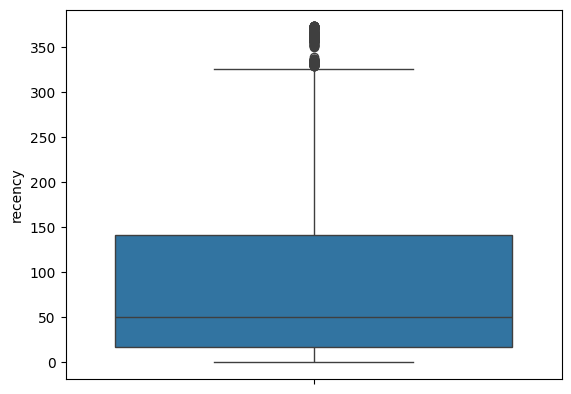

In [ ]:
sns.boxplot(rfm['recency'])

<Axes: ylabel='frequency'>

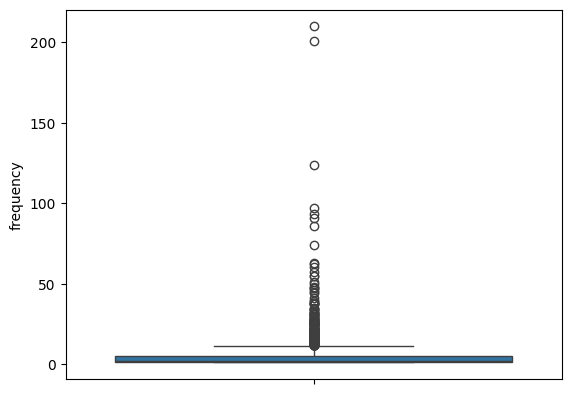

In [ ]:
sns.boxplot(rfm['frequency'])

<Axes: ylabel='monetary'>

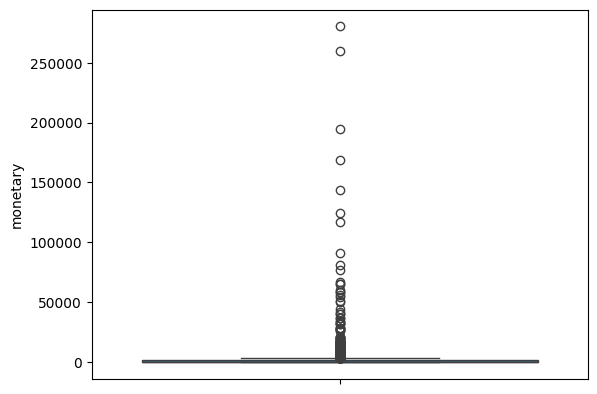

In [ ]:
sns.boxplot(rfm['monetary'])

In [48]:
#treating outliers
columns = rfm.select_dtypes(include=['number']).columns.tolist()
lower_bound = rfm[columns].quantile(0.05)       #calcualting the lower bound
upper_bound = rfm[columns].quantile(0.95)       #calcualting the upper bound
IQR = upper_bound - lower_bound                 #calcualting the IQR

for col in columns:
  rfm = rfm[(rfm[col] >= lower_bound[col] - 1.5*IQR[col]) & (rfm[col] <= upper_bound[col] + 1.5*IQR[col])]

rfm.shape

(4303, 4)

In [49]:
#scaling
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = pd.DataFrame(scaler.fit_transform(rfm[columns]))

#renaming columns
rfm_df_scaled.columns = ['recency', 'frequency', 'monetary']
rfm_df_scaled.head()

,recency,frequency,monetary
0,2.304422,-0.478451,-0.725326
1,-0.904982,0.547448,1.717650
2,-0.181875,-0.068091,0.293378
3,-0.736587,-0.683631,0.270881
4,2.145933,-0.683631,-0.535783


**Customer Segmentation Modelling**

Finding the Optimal Number of Clusters

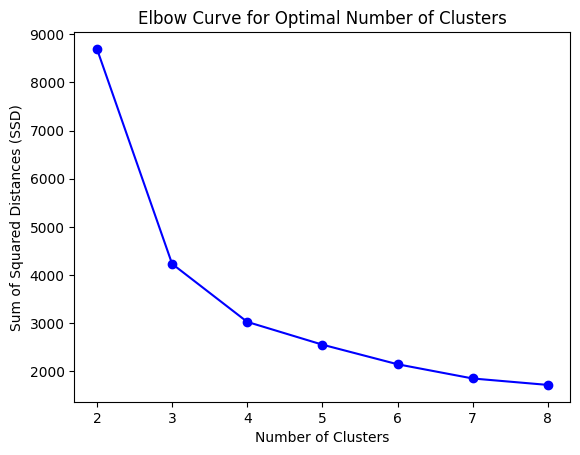

In [50]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd, marker='o', linestyle='-', color='b')  # Add dots to the plot
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.show()

In [51]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4076514798440882
For n_clusters=3, the silhouette score is 0.5117006733237855
For n_clusters=4, the silhouette score is 0.4902643546480207
For n_clusters=5, the silhouette score is 0.4379001062083443
For n_clusters=6, the silhouette score is 0.4179062763263587
For n_clusters=7, the silhouette score is 0.4194694481177133
For n_clusters=8, the silhouette score is 0.332539144348023


Applying K Means

In [52]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [53]:
rfm['cluster_id'] = kmeans.labels_
rfm.head()

,CustomerID,recency,frequency,monetary,cluster_id
0,12346.0,325,2,0.00,2
1,12347.0,1,7,4310.00,1
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,2


<Axes: xlabel='cluster_id', ylabel='recency'>

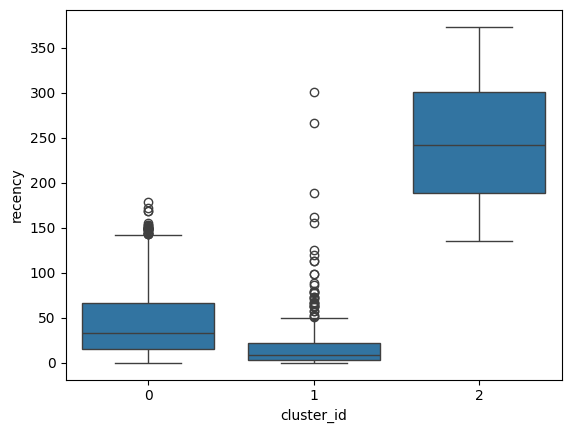

In [54]:
sns.boxplot(x='cluster_id', y='recency', data=rfm)

<Axes: xlabel='cluster_id', ylabel='frequency'>

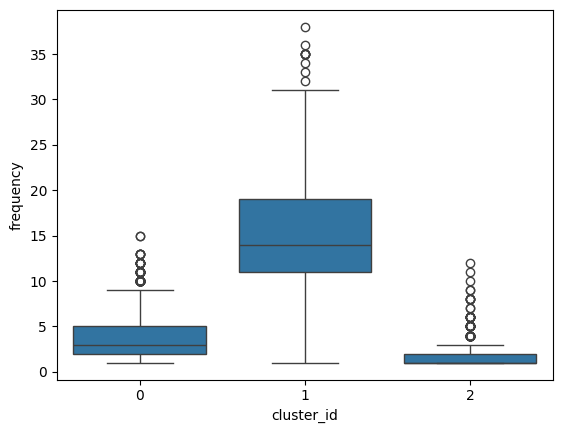

In [55]:
sns.boxplot(x='cluster_id', y='frequency', data=rfm)

<Axes: xlabel='cluster_id', ylabel='monetary'>

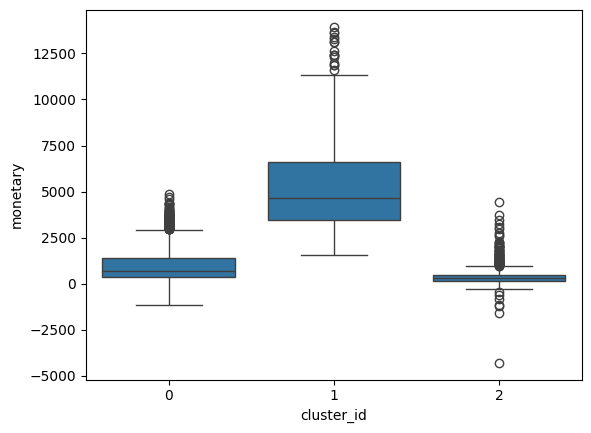

In [56]:
sns.boxplot(x='cluster_id', y='monetary', data=rfm)

**Conclusion**

**Cluster 0: Moderate Value Customers**

**Characterstics::**

- Moderate monetary value and frequency of purchases.
- Recent transactions but not as frequent or high-value as Cluster 2.

**Insights::**

- These customers are **moderately valuable and active.**
- Show potential to increase in value with the right strategies.

**Recommendations::**

- **Loyalty Programs**: Encourage repeat purchases through loyalty points or discounts.
- **Product Bundling**: Offer product bundles to increase transaction value.
- **Engagement Campaigns**: Share targeted ads or emails about new products or promotions.

**Cluster 1: Low Value and Inactive Customers**

**Characterstics::**

- Low monetary value and frequency of transactions.
- Inactive for a significant period.

**Insights::**

- Likely **disengaged or one-time customers.**
- May require significant effort to reactivate.

**Recommendations::**

- **Re-engagement Campaigns**: Use "We Miss You" promotions to bring them back.
- **Targeted Emails**: Provide personalized offers based on past preferences.
- **Feedback Collection**: Identify reasons for inactivity and address any issues.

**Cluster 2: High-Value and Active Customers**

**Characterstics::**

- High monetary value, frequent purchases, and the most recent transaction dates.

**Insights::**

- These are the **most valuable and loyal customers.**
- Critical for driving revenue and business success.

**Recommendations::**

- **Retention Strategies**: Offer exclusive rewards, early access to sales, and VIP benefits.
- **Feedback and Insights**: Gather input from this cluster to improve products and services.
- **Personalized Marketing**: Tailor offers and promotions to their preferences to maintain engagement.


